# Graphing to Evaluate Performance on Regression Tasks

In [1]:
import numpy as np
import os
import random
import tensorflow as tf
import csv
import pickle
import sys
import matplotlib.pyplot as plt
import pandas as pd

2025-12-12 14:14:52.811460: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-12 14:14:54.930171: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# plot the number of gradient step vs. mean squared error 

5
-
pretrain 5:
oracle 5: 
- 
pretrain 5 eval: cls_5.mbs_25.ubs_5.numstep1.updatelr0.001pretrainnonorm_eval
oracle 5 eval: cls_5.mbs_25.ubs_5.numstep1.updatelr0.001oraclenonorm_eval


10
-
MAML 10:
pretrain 10:
oracle 10:
MAML 10 eval: cls_5.mbs_25.ubs_10.numstep1.updatelr0.001nonorm_eval
pretrain 10 eval: cls_5.mbs_25.ubs_10.numstep1.updatelr0.001pretrainnonorm_eval
oracle 10 eval: cls_5.mbs_25.ubs_10.numstep1.updatelr0.001oraclenonorm_eval


20
-
pretrain 20
oracle 20
-
pretrain 20 eval: cls_5.mbs_25.ubs_20.numstep1.updatelr0.001pretrainnonorm_eval
oracle 20 eval: cls_5.mbs_25.ubs_20.numstep1.updatelr0.001oraclenonorm_eval

In [2]:
model_types = ["", "pretrain", "oracle"]
grad_steps = [5, 10, 20]
# k = grad_step element

In [3]:
# file_path = 'logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.001nonorm/test_ubs10_stepsize0.001.csv'

my_list = []
for k in grad_steps:
    my_dict = {}
    for mt in model_types:
        filepath = f'logs/sine/cls_5.mbs_25.ubs_{k}.numstep1.updatelr0.001{mt}nonorm_eval/test_ubs{k}_stepsize0.001.csv'

        print(filepath)
        
        if mt == "":
            my_dict["MAML"] = filepath
        else:
            my_dict[mt] = filepath
    print("")
    my_list.append(my_dict)

logs/sine/cls_5.mbs_25.ubs_5.numstep1.updatelr0.001nonorm_eval/test_ubs5_stepsize0.001.csv
logs/sine/cls_5.mbs_25.ubs_5.numstep1.updatelr0.001pretrainnonorm_eval/test_ubs5_stepsize0.001.csv
logs/sine/cls_5.mbs_25.ubs_5.numstep1.updatelr0.001oraclenonorm_eval/test_ubs5_stepsize0.001.csv

logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.001nonorm_eval/test_ubs10_stepsize0.001.csv
logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.001pretrainnonorm_eval/test_ubs10_stepsize0.001.csv
logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.001oraclenonorm_eval/test_ubs10_stepsize0.001.csv

logs/sine/cls_5.mbs_25.ubs_20.numstep1.updatelr0.001nonorm_eval/test_ubs20_stepsize0.001.csv
logs/sine/cls_5.mbs_25.ubs_20.numstep1.updatelr0.001pretrainnonorm_eval/test_ubs20_stepsize0.001.csv
logs/sine/cls_5.mbs_25.ubs_20.numstep1.updatelr0.001oraclenonorm_eval/test_ubs20_stepsize0.001.csv



In [4]:
my_list

[{'MAML': 'logs/sine/cls_5.mbs_25.ubs_5.numstep1.updatelr0.001nonorm_eval/test_ubs5_stepsize0.001.csv',
  'pretrain': 'logs/sine/cls_5.mbs_25.ubs_5.numstep1.updatelr0.001pretrainnonorm_eval/test_ubs5_stepsize0.001.csv',
  'oracle': 'logs/sine/cls_5.mbs_25.ubs_5.numstep1.updatelr0.001oraclenonorm_eval/test_ubs5_stepsize0.001.csv'},
 {'MAML': 'logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.001nonorm_eval/test_ubs10_stepsize0.001.csv',
  'pretrain': 'logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.001pretrainnonorm_eval/test_ubs10_stepsize0.001.csv',
  'oracle': 'logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.001oraclenonorm_eval/test_ubs10_stepsize0.001.csv'},
 {'MAML': 'logs/sine/cls_5.mbs_25.ubs_20.numstep1.updatelr0.001nonorm_eval/test_ubs20_stepsize0.001.csv',
  'pretrain': 'logs/sine/cls_5.mbs_25.ubs_20.numstep1.updatelr0.001pretrainnonorm_eval/test_ubs20_stepsize0.001.csv',
  'oracle': 'logs/sine/cls_5.mbs_25.ubs_20.numstep1.updatelr0.001oraclenonorm_eval/test_ubs20_stepsize0.

FILEPATH: logs/sine/cls_5.mbs_25.ubs_5.numstep1.updatelr0.001nonorm_eval/test_ubs5_stepsize0.001.csv
Model name: MAML, k=5
means: [3.228013   0.8574748  0.652594   0.75482583 0.59450084 0.5759976
 0.5626775  0.5440524  0.5399413  0.5329566  0.5232443 ]
means len: 11
steps: range(0, 11)
steps len: 11

FILEPATH: logs/sine/cls_5.mbs_25.ubs_5.numstep1.updatelr0.001pretrainnonorm_eval/test_ubs5_stepsize0.001.csv
Model name: pretrain, k=5
means: [3.2290006 2.928186  2.8985412 2.9329464 2.9482436 3.0061462 3.0185885
 3.0219204 3.0567563 3.0549686 3.0887249]
means len: 11
steps: range(0, 11)
steps len: 11

FILEPATH: logs/sine/cls_5.mbs_25.ubs_5.numstep1.updatelr0.001oraclenonorm_eval/test_ubs5_stepsize0.001.csv
Model name: oracle, k=5
means: [1.5654743e-03 2.4102736e-02 1.0946468e+00 1.4081313e+01 1.5409879e+01
 2.0929214e+01 2.0930542e+01 2.0447739e+01 1.0659946e+01 8.0332580e+00
 6.6562560e+00]
means len: 11
steps: range(0, 11)
steps len: 11

FILEPATH: logs/sine/cls_5.mbs_25.ubs_10.numstep1.

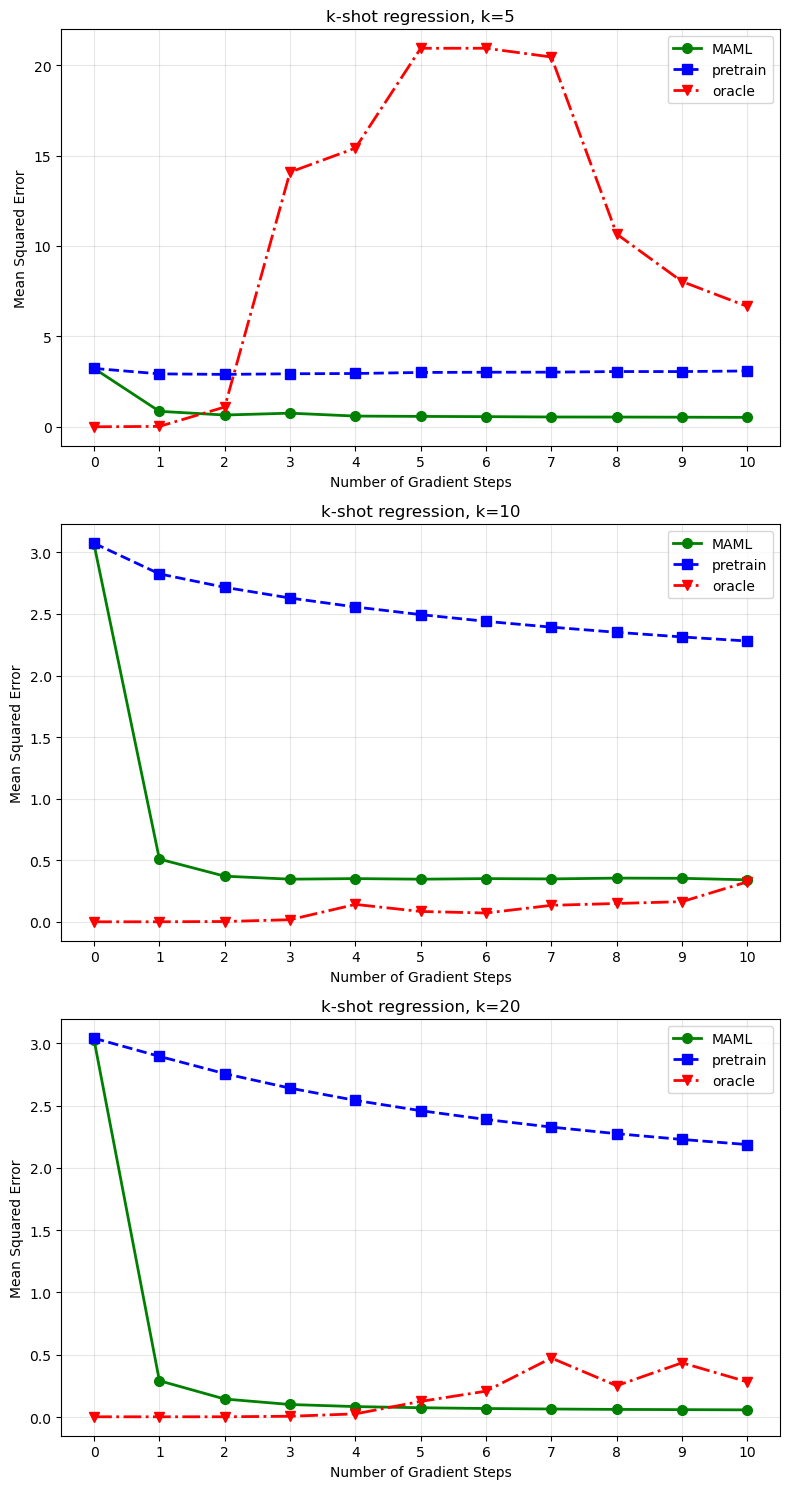

In [5]:
# Create 3 subplots for 5-shot, 10-shot, 20-shot
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

for i, (k, model_dict) in enumerate(zip(grad_steps, my_list)):
    ax = axes[i]
    
    for model_name, filepath in model_dict.items():
        print(f"FILEPATH: {filepath}")
        try:
            df = pd.read_csv(filepath)
            
            means = df.iloc[1].values
            steps = range(len(means))
            print(f"Model name: {model_name}, k={k}")
            print(f"means: {means}")
            print(f"means len: {len(means)}")
            print(f"steps: {steps}")
            print(f"steps len: {len(steps)}\n")
            # There are 11 elements bc 0 = NO gradient steps, then 1-10 gradient steps

            if model_name == "MAML":
                color = 'green'
                linestyle = '-'
                marker='o'
            elif model_name == "pretrain":
                color='blue'
                linestyle = '--'
                marker='s'

            elif model_name == "oracle":
                color='red'
                linestyle='-.'
                marker='v'

            ax.plot(steps, means, color=color, linestyle=linestyle, marker=marker, label=model_name, linewidth=2, markersize=7)

        except FileNotFoundError:
            print(f"SKIP: {filepath}\n")
        
            
    ax.set_xticks(steps)    
    ax.set_xlabel('Number of Gradient Steps')
    ax.set_ylabel('Mean Squared Error')
    ax.set_title(f'k-shot regression, k={k}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Matching the paper by using a True, theoretical Oracle model

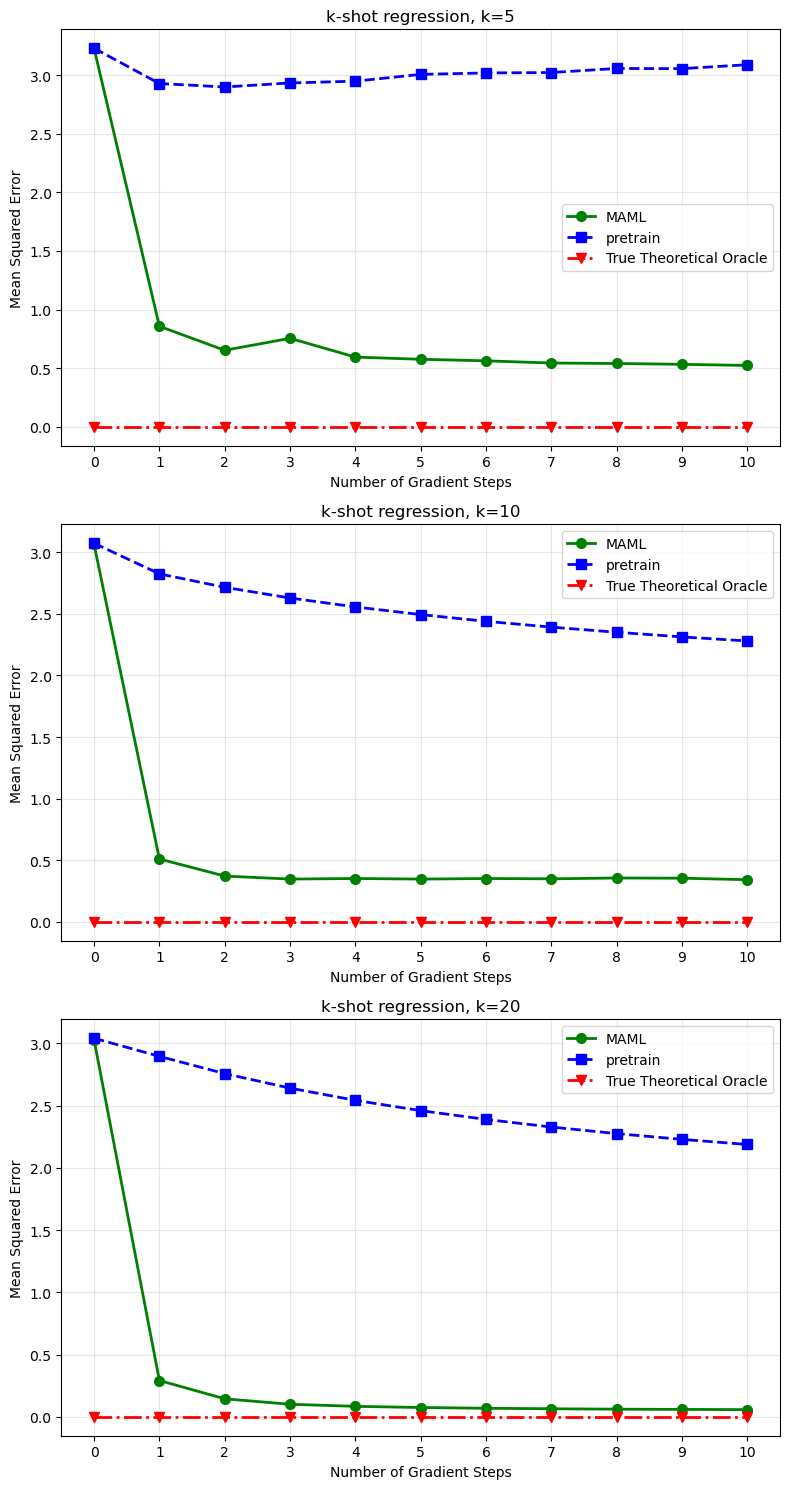

In [6]:
# Create 3 subplots for 5-shot, 10-shot, 20-shot
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

for i, (k, model_dict) in enumerate(zip(grad_steps, my_list)):
    ax = axes[i]
    
    for model_name, filepath in model_dict.items():
#         print(f"FILEPATH: {filepath}")
        try:
            df = pd.read_csv(filepath)
            
            means = df.iloc[1].values
            steps = range(len(means))
            
#             print(f"Model name: {model_name}, k={k}")
#             print(f"means: {means}")
#             print(f"means len: {len(means)}")
#             print(f"steps: {steps}")
#             print(f"steps len: {len(steps)}\n")
#             # There are 11 elements bc 0 = NO gradient steps, then 1-10 gradient steps

            if model_name == "MAML":
                color = 'green'
                linestyle = '-'
                marker='o'
            elif model_name == "pretrain":
                color='blue'
                linestyle = '--'
                marker='s'

            elif model_name == "oracle":
                color='red'
                linestyle='-.'
                marker='v'
            
            if model_name == "oracle":
                means = [0] * len(means)
                model_name = "True Theoretical Oracle"
                
            ax.plot(steps, means, color=color, linestyle=linestyle, marker=marker, label=model_name, linewidth=2, markersize=7)

        except FileNotFoundError:
            print(f"SKIP: {filepath}\n")
        
            
    ax.set_xticks(steps)
    ax.set_xlabel('Number of Gradient Steps')
    ax.set_ylabel('Mean Squared Error')
    ax.set_title(f'k-shot regression, k={k}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

 # plot the sine wave predictions vs. actual sine waves

In [7]:
# there are 600 total predictions
# I only want to look at a handful of them
# selected_indices = [0, 3, 7, 22, 23, 40, 121, 316]
# selected_indices = [0,1,2]
selected_indices = [0, 40, 316, 599]

In [8]:
predictions_list = []

for k in grad_steps:
    my_dict = {}
    for mt in model_types:
        filepath = f'logs/sine/cls_5.mbs_25.ubs_{k}.numstep1.updatelr0.001{mt}nonorm_eval/test_ubs{k}_stepsize0.001/sine_predictions.pkl'
        
        print(filepath)
        
        try:
            with open(filepath, 'rb') as f:
                predictions = pickle.load(f)

            # print(predictions)
            # print(type(predictions))
            selected_predictions = []
            for i in selected_indices:
                selected_predictions.append(predictions[i])

            if mt == "":
                my_dict["MAML"] = selected_predictions
            else:
                my_dict[mt] = selected_predictions
        except FileNotFoundError:
            print(f"SKIP: {filepath}\n")
    
 
    predictions_list.append(my_dict)

logs/sine/cls_5.mbs_25.ubs_5.numstep1.updatelr0.001nonorm_eval/test_ubs5_stepsize0.001/sine_predictions.pkl
logs/sine/cls_5.mbs_25.ubs_5.numstep1.updatelr0.001pretrainnonorm_eval/test_ubs5_stepsize0.001/sine_predictions.pkl
logs/sine/cls_5.mbs_25.ubs_5.numstep1.updatelr0.001oraclenonorm_eval/test_ubs5_stepsize0.001/sine_predictions.pkl
logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.001nonorm_eval/test_ubs10_stepsize0.001/sine_predictions.pkl
logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.001pretrainnonorm_eval/test_ubs10_stepsize0.001/sine_predictions.pkl
logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.001oraclenonorm_eval/test_ubs10_stepsize0.001/sine_predictions.pkl
logs/sine/cls_5.mbs_25.ubs_20.numstep1.updatelr0.001nonorm_eval/test_ubs20_stepsize0.001/sine_predictions.pkl
logs/sine/cls_5.mbs_25.ubs_20.numstep1.updatelr0.001pretrainnonorm_eval/test_ubs20_stepsize0.001/sine_predictions.pkl
logs/sine/cls_5.mbs_25.ubs_20.numstep1.updatelr0.001oraclenonorm_eval/test_ubs20_stepsize0

In [9]:
print(len(predictions_list))

3


In [10]:
print(predictions_list)

[{'MAML': [{'inputa': array([[[-4.99885625],
        [-1.97667427],
        [-3.53244109],
        [-4.07661405],
        [-3.13739789]]]), 'labela': array([[[-1.77846568],
        [ 1.90831914],
        [ 1.00453863],
        [-0.12081317],
        [ 1.65585412]]]), 'inputb': array([[[-1.54439273],
        [-1.03232526],
        [ 0.38816734],
        [-0.80805486],
        [ 1.852195  ]]]), 'labelb': array([[[ 1.32390134],
        [ 0.32814354],
        [-2.04512406],
        [-0.15113832],
        [-0.85589796]]]), 'preupdate': array([[[-0.3937192],
        [ 0.9305335],
        [ 1.5428534],
        [ 0.849807 ],
        [ 1.6310395]]], dtype=float32), 'predictions': [array([[[ 1.7554066 ],
        [ 0.8747664 ],
        [-1.5906341 ],
        [ 0.33690053],
        [-1.0134761 ]]], dtype=float32), array([[[ 1.7175117 ],
        [ 0.4431017 ],
        [-1.5427253 ],
        [-0.05970603],
        [-0.65173084]]], dtype=float32), array([[[ 1.5083008 ],
        [ 0.35312068],
       

In [11]:
# dict_keys = ['inputa', 'labela', 'inputb', 'labelb', 'preupdate', 'predictions', 'amp', 'phase']

In [21]:
def plot_predictions_vs_actual(selected_predictions, num_figures, model_type):
    # Plot each example
    # rows = 1
    # cols = num_figures
    # width = 20 * 5
    # height = 3 * 5
    # fig, axes = plt.subplots(rows, cols, figsize=(width, height))

    fig, axes = plt.subplots(1, num_figures, figsize=(20, 5))

    for i, sp in enumerate(selected_predictions):
        ax = axes[i]

        # print(sp.keys())
        # Get true sine wave parameters
        amp = sp['amp'][0]
        phase = sp['phase'][0]

        # REVERSE ENGINEER to Create true sine wave
        # Create a numpy.ndarray that has 200 evenly spaced numbers going from -5 to 5
        # BECAUSE: the train & test datapoints' x-values were sampled from [-5, 5]
        x_true = np.linspace(-5, 5, 200)
        y_true = amp * np.sin(x_true - phase)

        # Support points (inputa/labela)
        # x_support = sp['inputa'][0].flatten()
        # y_support = sp['labela'][0].flatten()
        # Plot support points
        # plt.scatter(x_support, y_support, c='red', s=50, label='Support set')

        
        if model_type != "oracle":
            x_query = sp['inputb'][0].flatten()
            x_support = sp['inputa'][0].flatten()
        else:
            x_query = sp['inputb'][0, :, 0].flatten()
            x_support = sp['inputa'][0, :, 0].flatten()
        
        # Query points (inputb/labelb) 
        y_query = sp['labelb'][0].flatten()
        
        # Preupdate prediction
        preupdates = sp['preupdate'][0].flatten()
        
        # print(f"x_query: {x_query}")
        # print(f"y_query: {y_query}")
        # print(f"x_support: {x_support}")
        # print(f"preupdates: {preupdates}")
        
        # Plot preupdate points
        # ax.plot(x_support, preupdates, 'g:', label='pre-update', linewidth=2, alpha=0.7)
        ax.scatter(x_support, preupdates, c='green', label='pre-update', linewidth=2)
#         ax.scatter(x_query, preupdates, c='lime', label='pre-update', linewidth=2)

        # Get predictions at different steps
        predictions = sp['predictions']

        # Plot the predictions of only doing 1 Gradient step, and 10 Gradient steps
        steps_to_plot = [0, 9]
        for step in steps_to_plot:
            predictions_at_step_i = predictions[step]
            y_pred = predictions_at_step_i[0].flatten()
            if step == 0:
                pred_color = 'blue'
            else:
                pred_color = 'magenta'
            ax.scatter(x_query, y_pred, c=pred_color, label=f'{step+1} gradient steps')

        # Plot true sine wave
        ax.plot(x_true, y_true, 'r-', label='ground truth', linewidth=1)

        # Plot query points
        ax.scatter(x_query, y_query, c='purple', s=80, label='used for grad', marker='^')
        
        ax.legend(fontsize=8)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(f'Regression Task {selected_indices[i]}')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Gradient steps: k=5
MODEL TYPE: MAML


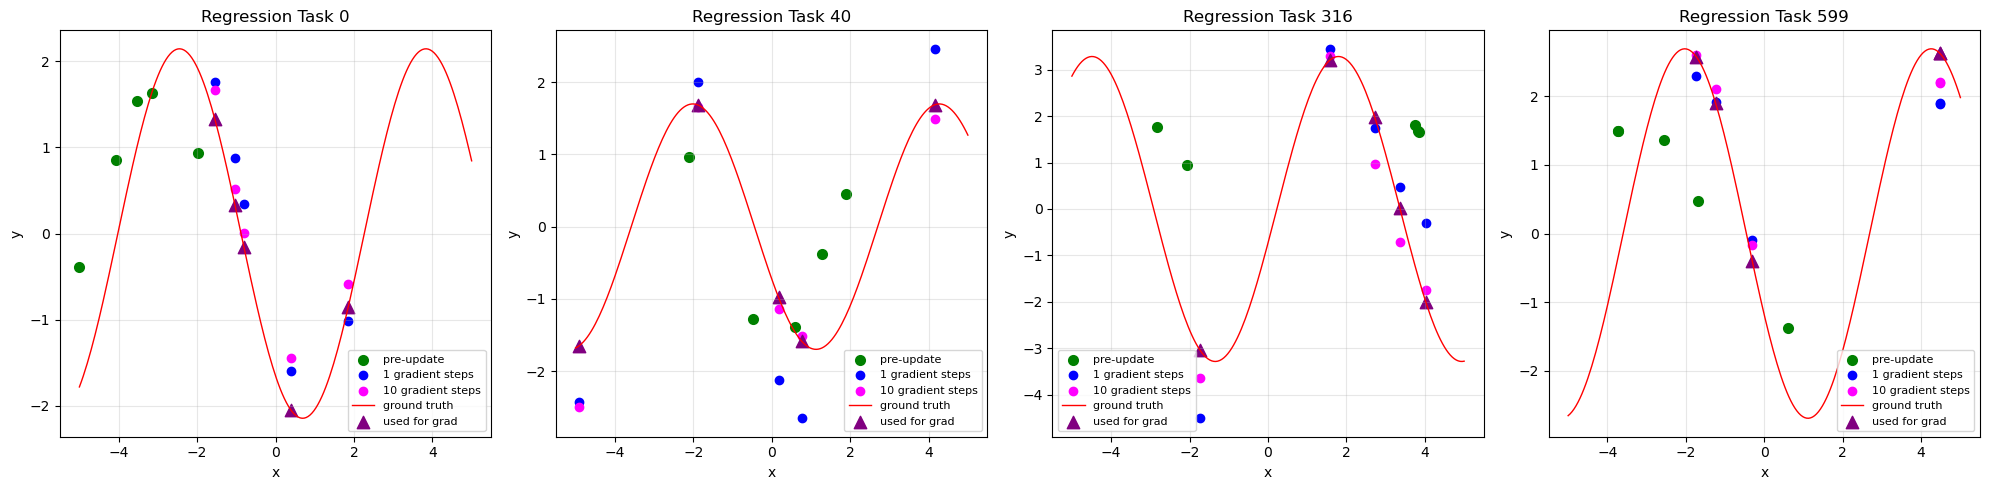

MODEL TYPE: pretrain


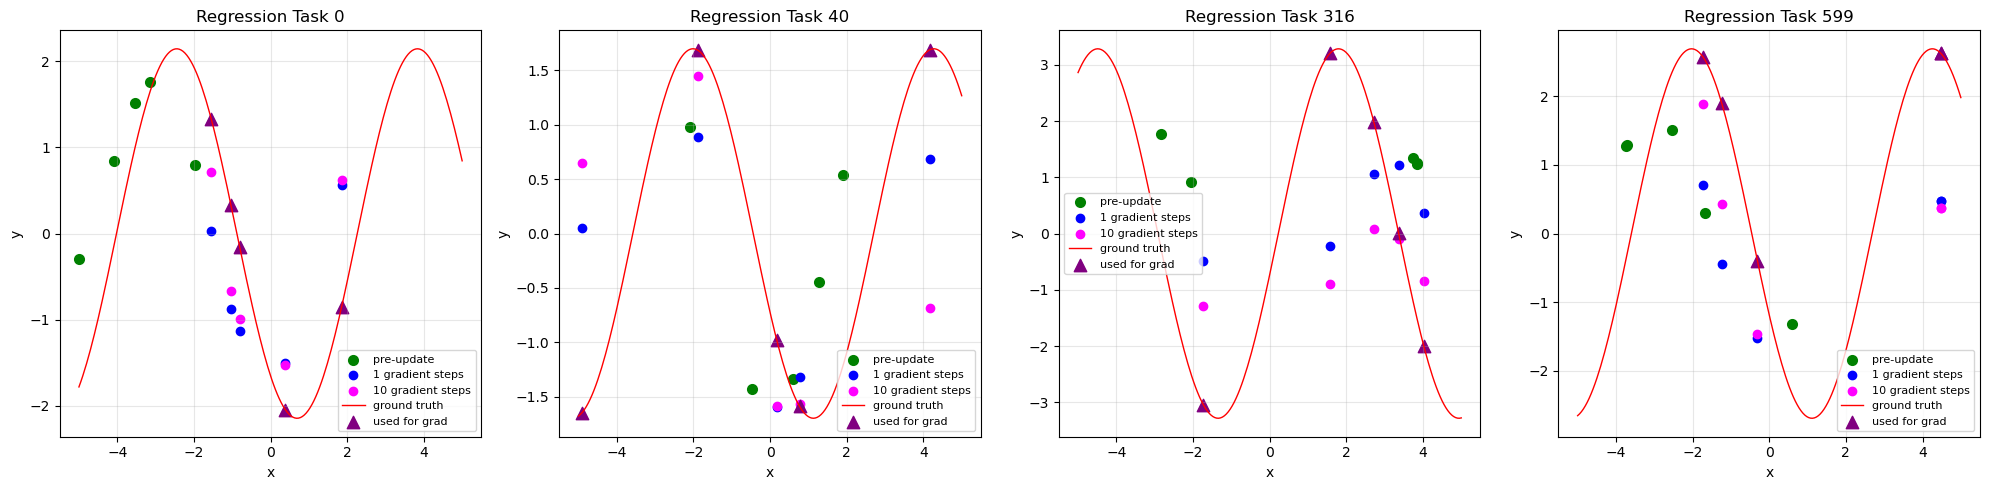

MODEL TYPE: oracle


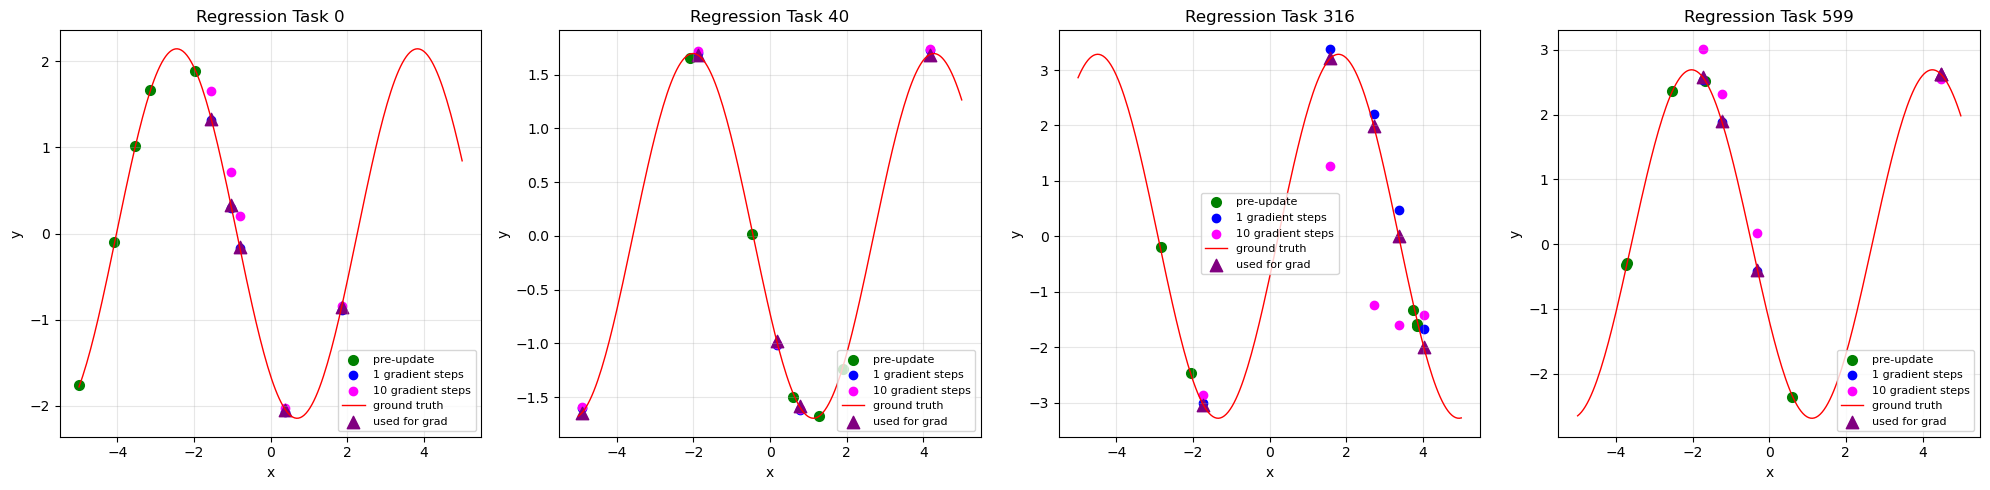

Gradient steps: k=10
MODEL TYPE: MAML


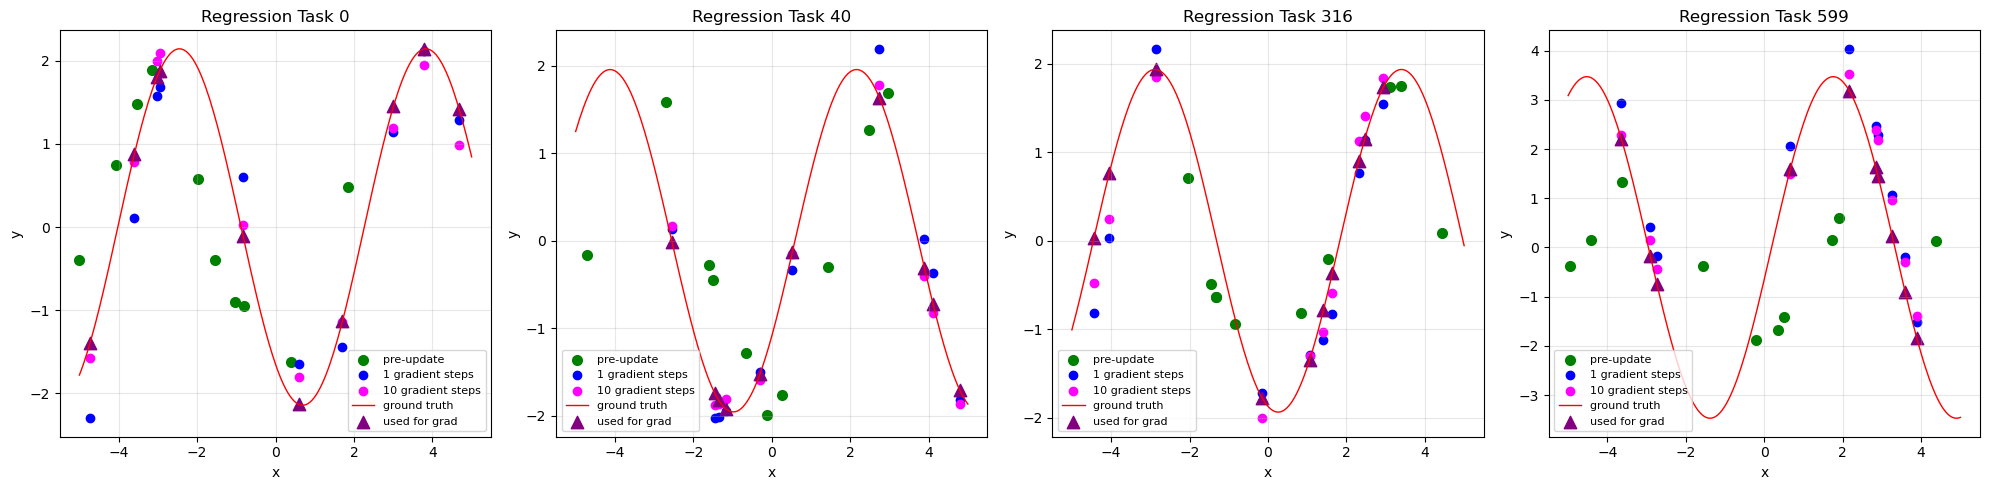

MODEL TYPE: pretrain


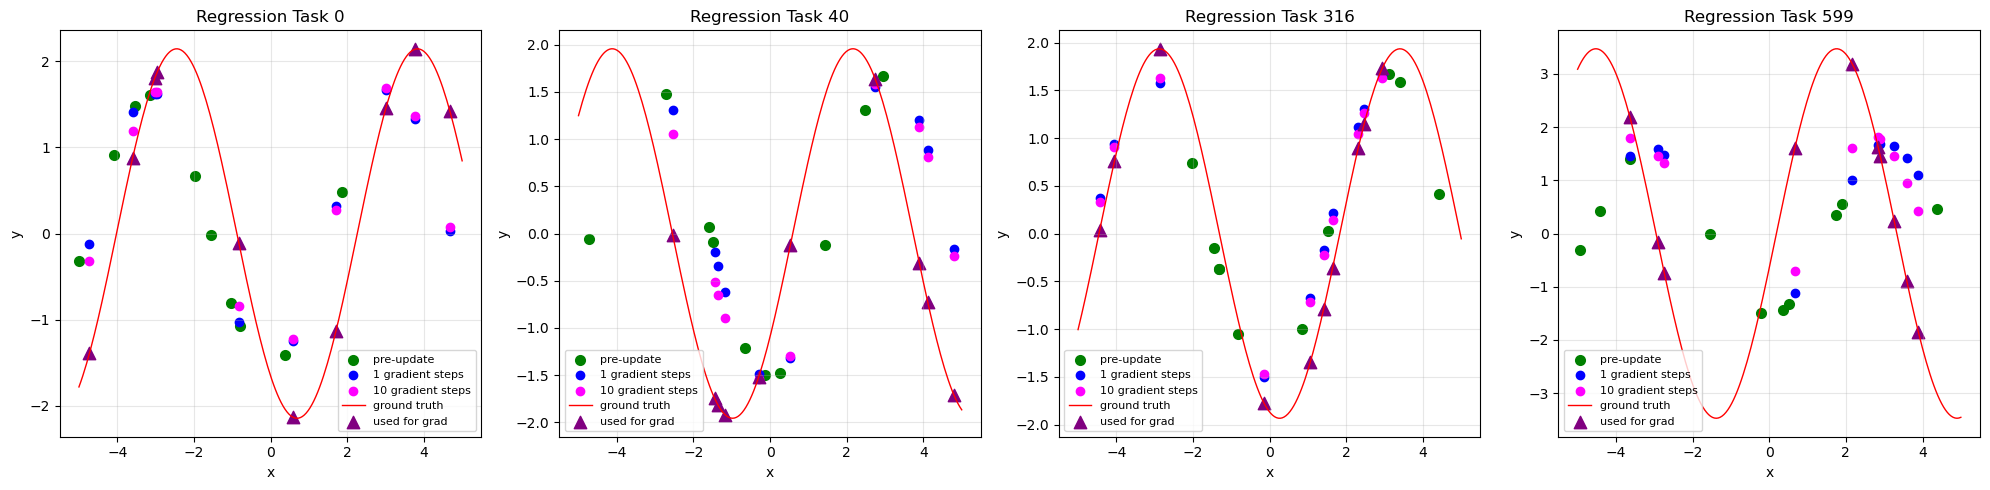

MODEL TYPE: oracle


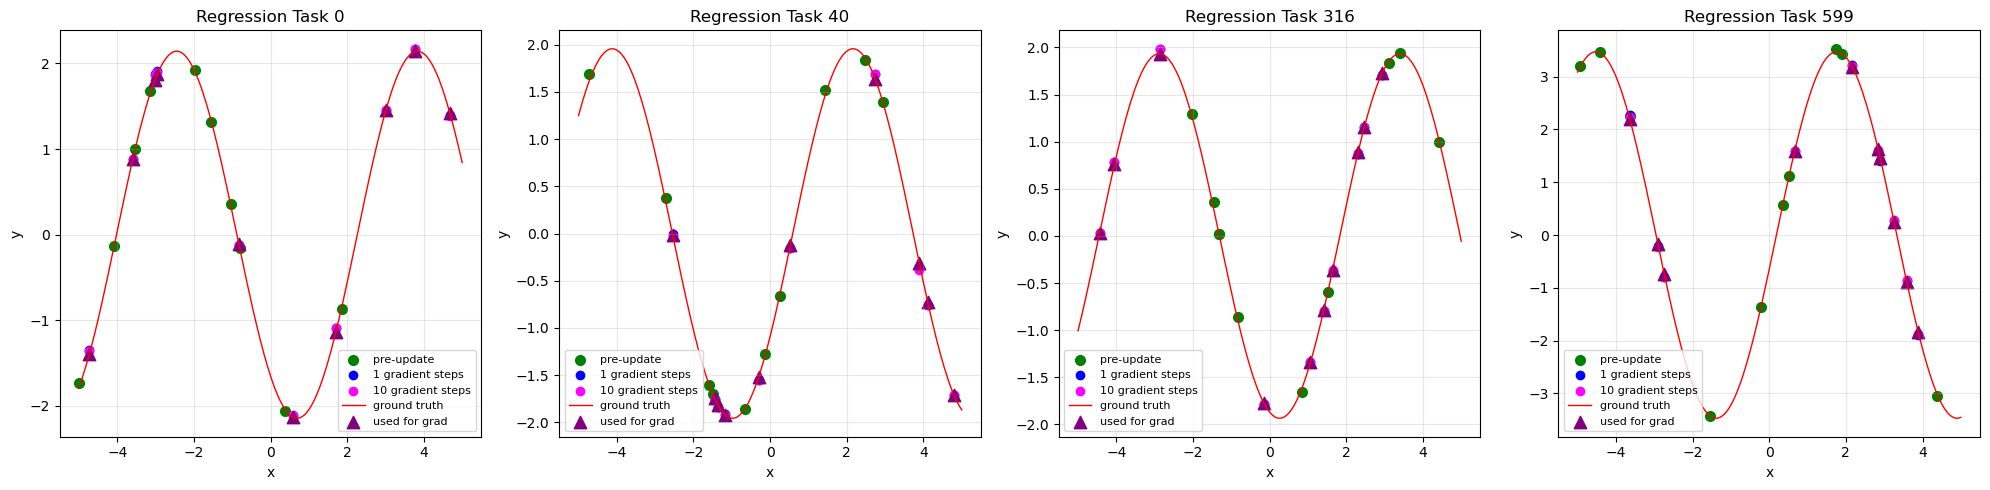

Gradient steps: k=20
MODEL TYPE: MAML


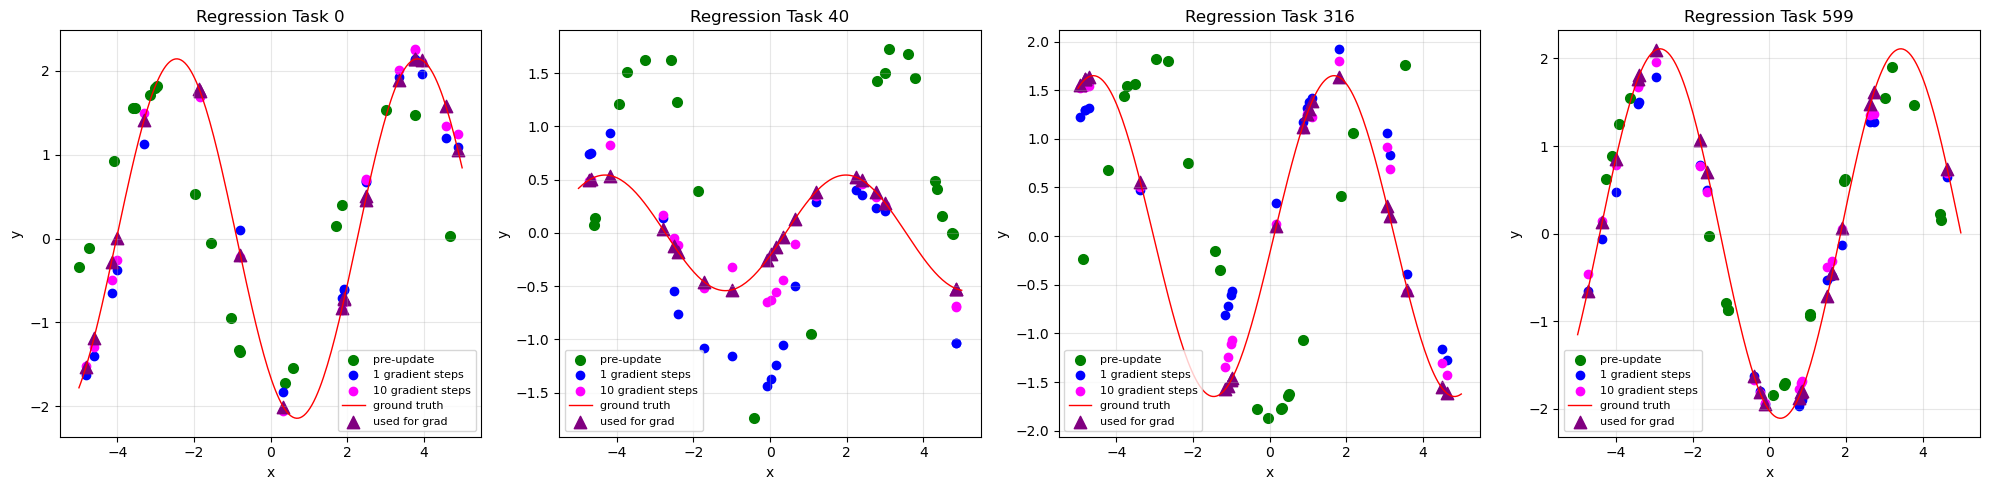

MODEL TYPE: pretrain


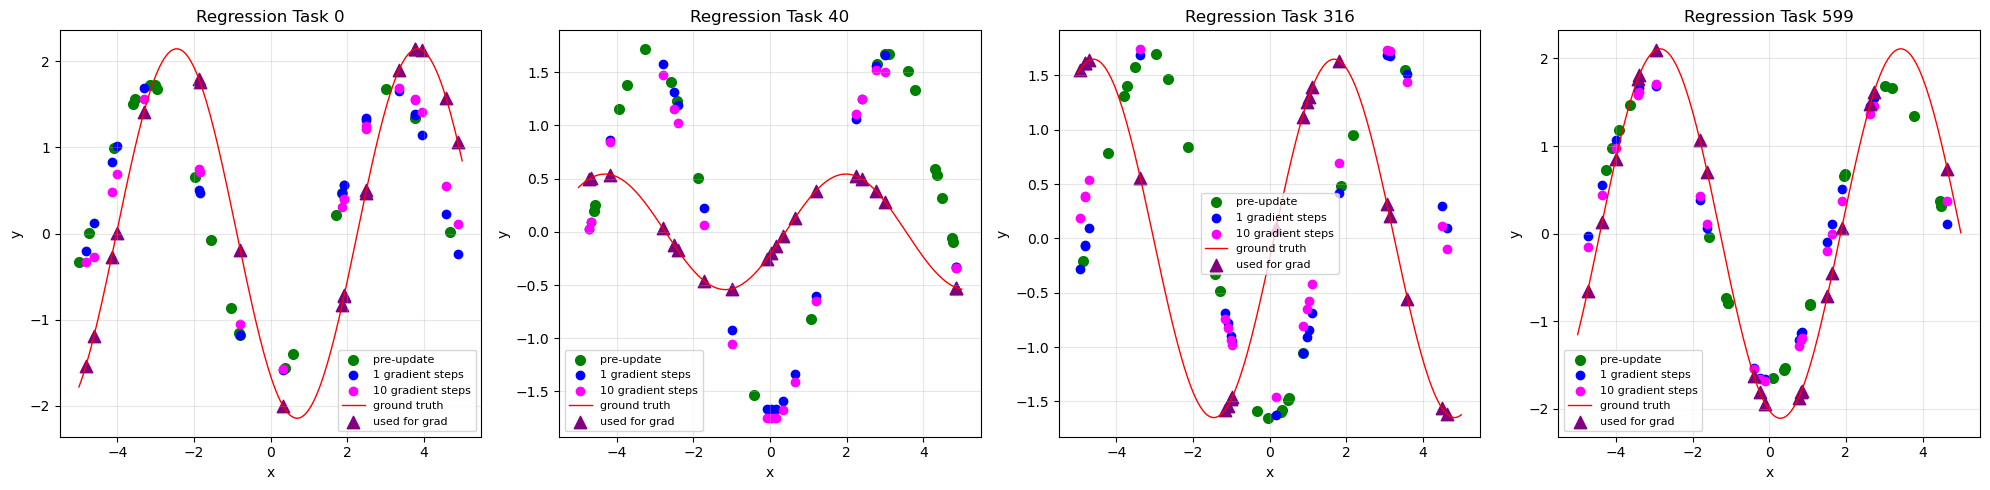

MODEL TYPE: oracle


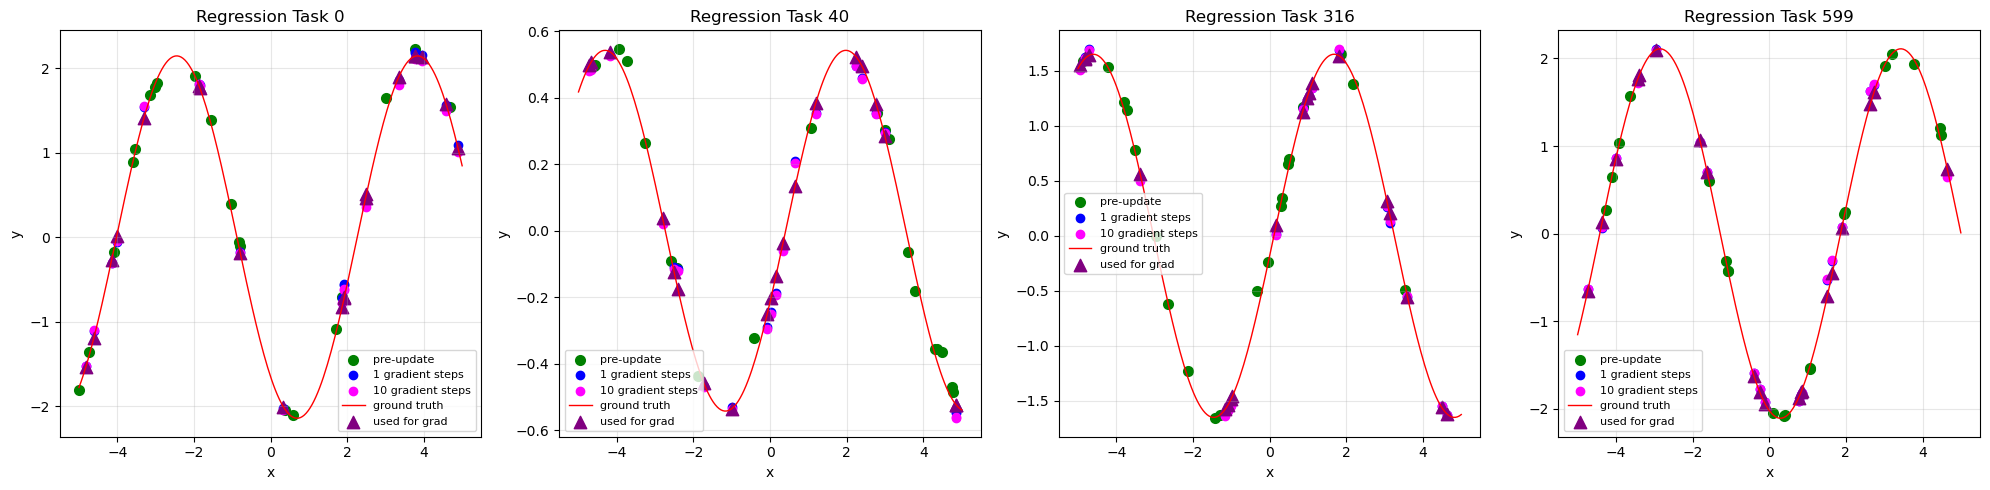

In [22]:
prediction_keys = ['MAML', 'pretrain', 'oracle']

for i, prediction in enumerate(predictions_list):
    k = grad_steps[i]
    # each prediction is a dictionary with keys: 'MAML', 'pretrain', and 'oracle'
    print(f"Gradient steps: k={k}")

    for p_key in list(prediction.keys()):
        selected_predictions = prediction[p_key]
        num_figures = len(selected_predictions)
        
        # plot
        print(f"MODEL TYPE: {p_key}")
        plot_predictions_vs_actual(selected_predictions, num_figures, p_key)

In [14]:
print("done!")

done!


# Full Sine Wave Extrapolation (MAML & pretrain Baseline only)

In [40]:
model_types = ["", "pretrain"]
grad_steps = [5, 10, 20]
prediction_keys = ['MAML', 'pretrain']
# filename = "full_sinewave_predictions"
filename = "full_sine_wave_predictions_NEW"

# selected_indices = [0, 3, 7, 22, 23, 40, 121, 316]
# selected_indices = [0,1,2]
selected_indices = [0, 40, 316, 599]

In [41]:
full_predictions_list = []

for k in grad_steps:
    my_dict = {}
    for mt in model_types:
        filepath = f'logs/sine/cls_5.mbs_25.ubs_{k}.numstep1.updatelr0.001{mt}nonorm_eval_Regression_Full_Sine_Wave/test_ubs{k}_stepsize0.001/{filename}.pkl'
#         print(filepath)

        try:
            with open(filepath, 'rb') as f:
                predictions = pickle.load(f)
                print(filepath)
                
            selected_predictions = []
            for i in selected_indices:
                selected_predictions.append(predictions[i])

            if mt == "":
                my_dict["MAML"] = selected_predictions
            else:
                my_dict[mt] = selected_predictions
        except FileNotFoundError:
            print(f"SKIP: {filepath}\n")
#             print("SKIP")
#             pass
    
 
    full_predictions_list.append(my_dict)

logs/sine/cls_5.mbs_25.ubs_5.numstep1.updatelr0.001nonorm_eval_Regression_Full_Sine_Wave/test_ubs5_stepsize0.001/full_sine_wave_predictions_NEW.pkl
logs/sine/cls_5.mbs_25.ubs_5.numstep1.updatelr0.001pretrainnonorm_eval_Regression_Full_Sine_Wave/test_ubs5_stepsize0.001/full_sine_wave_predictions_NEW.pkl
logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.001nonorm_eval_Regression_Full_Sine_Wave/test_ubs10_stepsize0.001/full_sine_wave_predictions_NEW.pkl
logs/sine/cls_5.mbs_25.ubs_10.numstep1.updatelr0.001pretrainnonorm_eval_Regression_Full_Sine_Wave/test_ubs10_stepsize0.001/full_sine_wave_predictions_NEW.pkl
logs/sine/cls_5.mbs_25.ubs_20.numstep1.updatelr0.001nonorm_eval_Regression_Full_Sine_Wave/test_ubs20_stepsize0.001/full_sine_wave_predictions_NEW.pkl
logs/sine/cls_5.mbs_25.ubs_20.numstep1.updatelr0.001pretrainnonorm_eval_Regression_Full_Sine_Wave/test_ubs20_stepsize0.001/full_sine_wave_predictions_NEW.pkl


In [42]:
print(len(full_predictions_list))
# print(full_predictions_list)

3


In [43]:
for prediction in full_predictions_list:
#     print(type(prediction))
#     print(len(prediction))
    
    if len(prediction) > 0:
        dict_keys = list(prediction.keys())
        print(dict_keys)
        
        model_key = dict_keys[0]
        value = prediction[model_key]

        print(type(value))
#         print(value)
        element = value[0]
        print(type(element))
        element_keys = list(element.keys())
        print(element_keys)
        # ['dense_x', 'dense_y', 'preupdate', 'postupdate', 'support_x', 'support_y', 'query_x', 'query_y', 'amp', 'phase']


['MAML', 'pretrain']
<class 'list'>
<class 'dict'>
['dense_x', 'dense_y', 'preupdate', 'postupdate', 'support_x', 'support_y', 'query_x', 'query_y', 'amp', 'phase']
['MAML', 'pretrain']
<class 'list'>
<class 'dict'>
['dense_x', 'dense_y', 'preupdate', 'postupdate', 'support_x', 'support_y', 'query_x', 'query_y', 'amp', 'phase']
['MAML', 'pretrain']
<class 'list'>
<class 'dict'>
['dense_x', 'dense_y', 'preupdate', 'postupdate', 'support_x', 'support_y', 'query_x', 'query_y', 'amp', 'phase']


In [45]:
def plot_all_preds_vs_actual(selected_predictions, num_figures, model_type):
    fig, axes = plt.subplots(1, num_figures, figsize=(20, 5))
    
    for i, sp in enumerate(selected_predictions[:num_figures]):
        ax = axes[i]

        # True sine wave
        x_dense = sp['dense_x'].flatten()
        y_true = sp['dense_y'].flatten()
        
        # Support points
        x_support = sp['support_x'].flatten()
        y_support = sp['support_y'].flatten()
        
        # Query points
        x_query = sp['query_x'].flatten()
        y_query = sp['query_y'].flatten()
               
        # Get predictions
        preupdate = sp['preupdate']
        postupdate = sp['postupdate']
        n = len(postupdate)
        # print(f"LENGTH OF POSTUPDATE: {n}")
        
        # Pre-update (green)
        ax.plot(x_dense, preupdate.flatten(), 'g-', label='Pre-update', linewidth=2)
        
        # After 1 step (blue)
        ax.plot(x_dense, postupdate[0].flatten(), 'b--', label='1 gradient step', linewidth=2)
        
        # After last step (magenta)
        ax.plot(x_dense, postupdate[-1].flatten(), 'm:', label=f'{n} gradient steps', linewidth=2)

        # Plot true sine wave
        ax.plot(x_dense, y_true, c='red', label='True sinewave', linewidth=2)
        
        # Plot support points
        # ax.scatter(x_support, y_support, c='purple', s=100, label='Used for grad', marker='^', zorder=5)
        
        # Plot query points
        ax.scatter(x_query, y_query, c='purple', s=100, label='Used for grad', marker='^', zorder=5)
        

        ax.legend()
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(f'Regression Task {selected_indices[i]}')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Gradient steps: k=5
MODEL TYPE: MAML


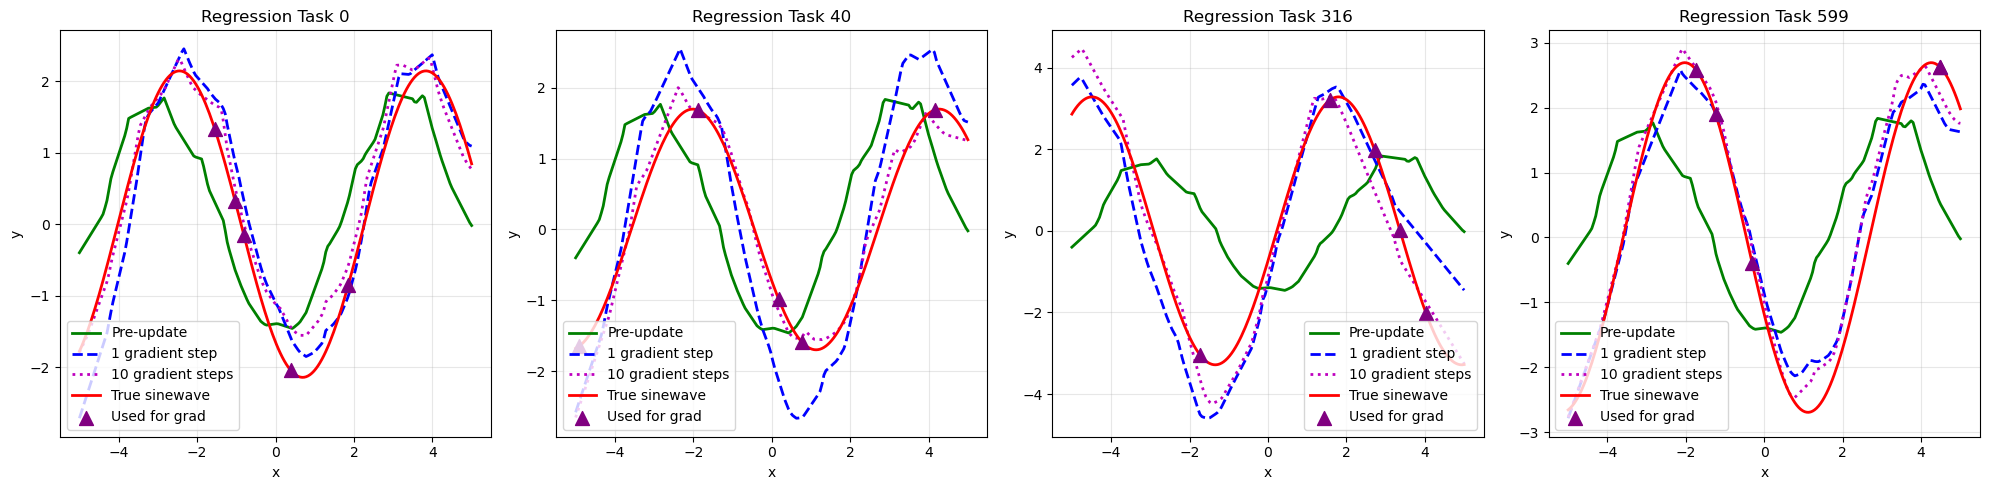

MODEL TYPE: pretrain


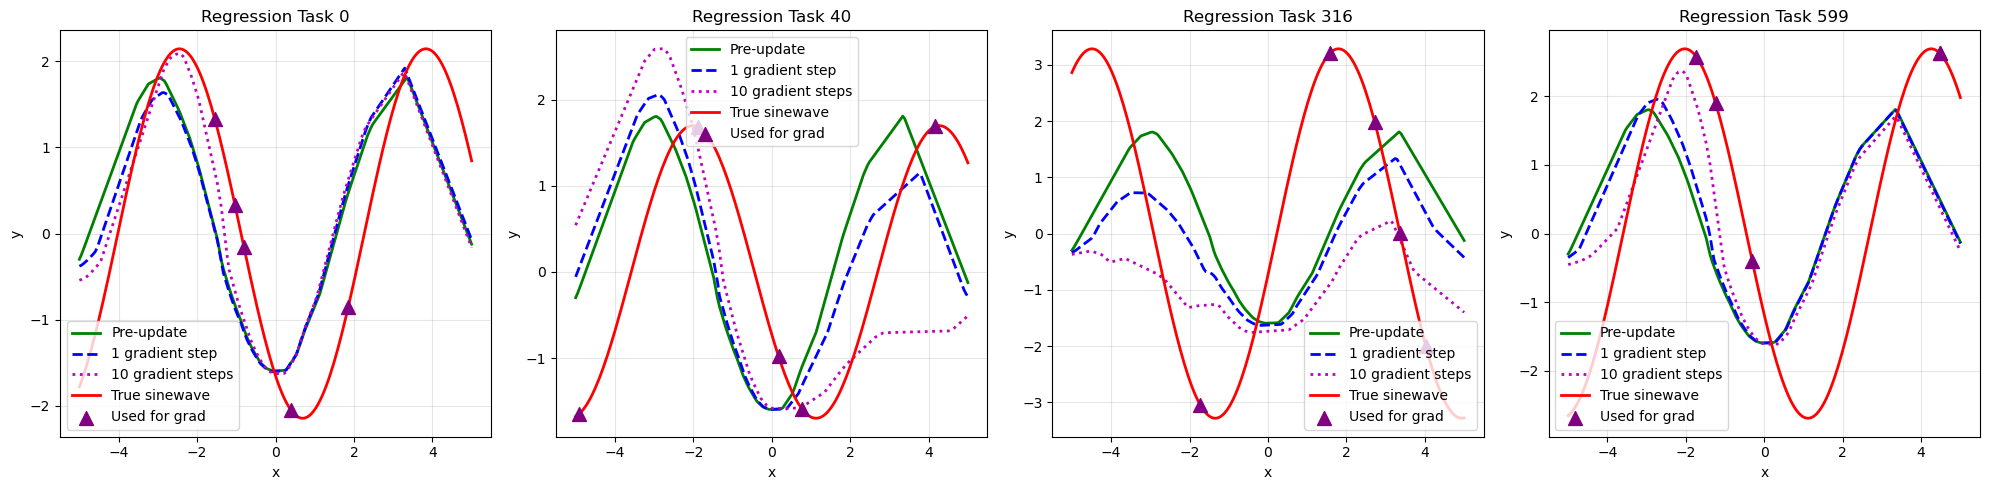

Gradient steps: k=10
MODEL TYPE: MAML


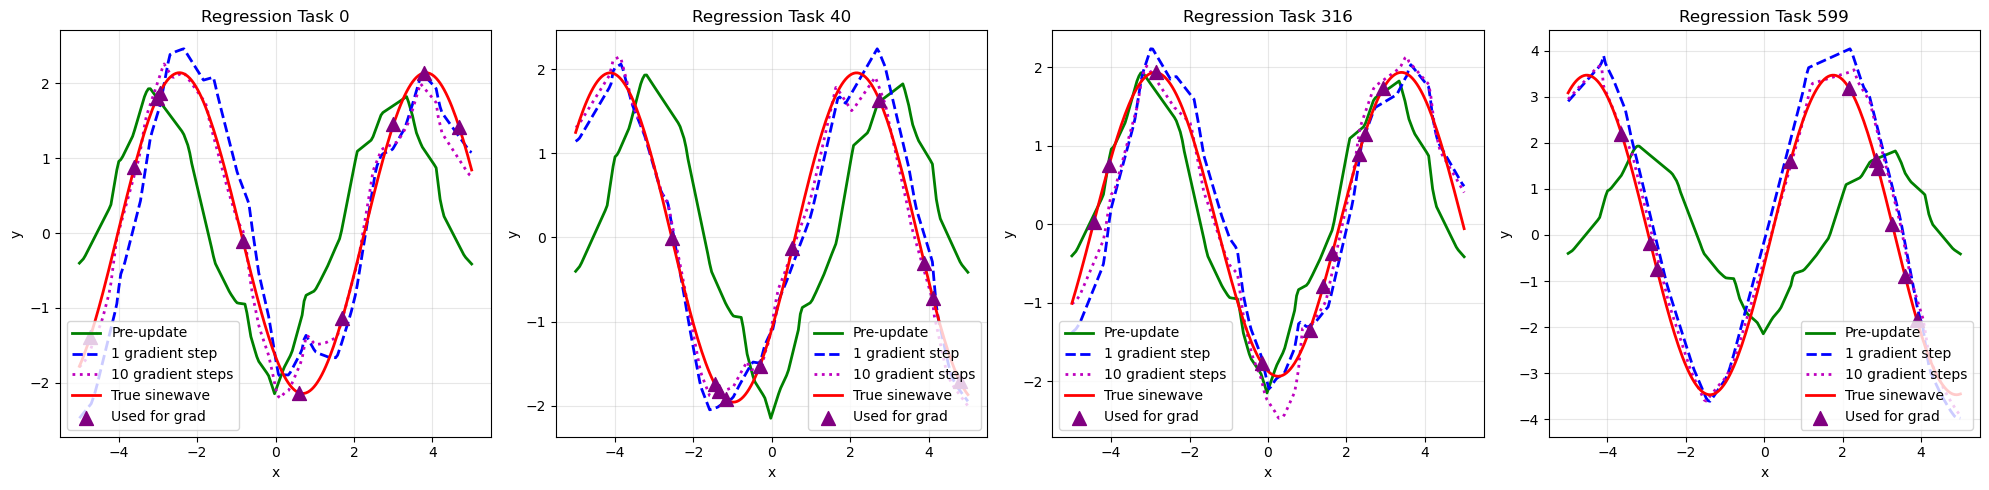

MODEL TYPE: pretrain


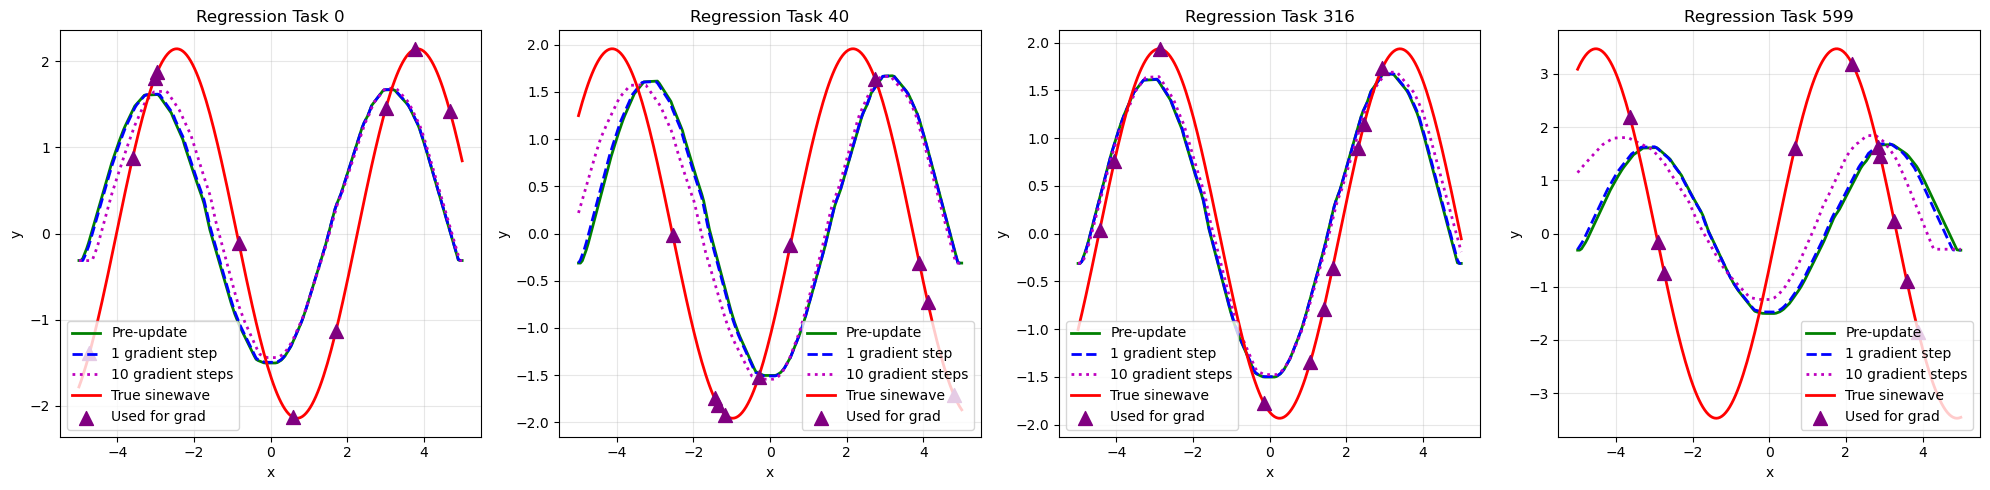

Gradient steps: k=20
MODEL TYPE: MAML


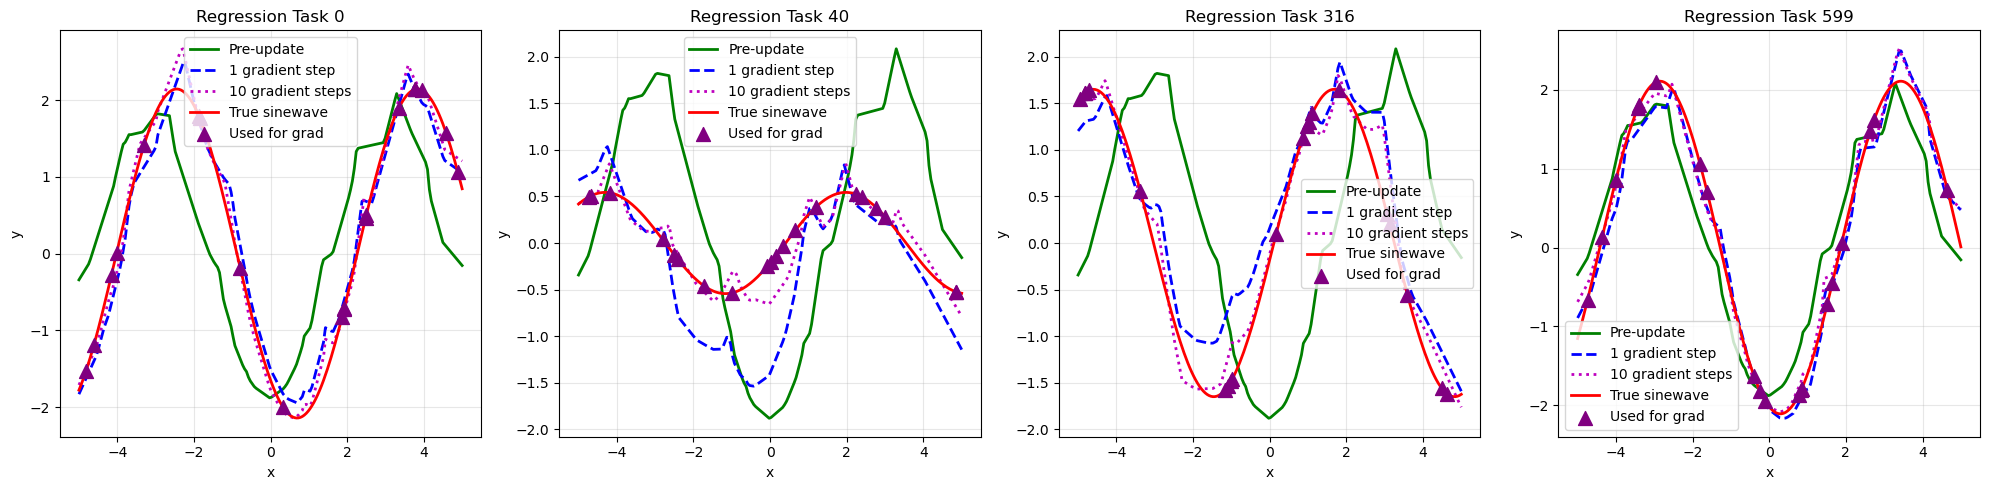

MODEL TYPE: pretrain


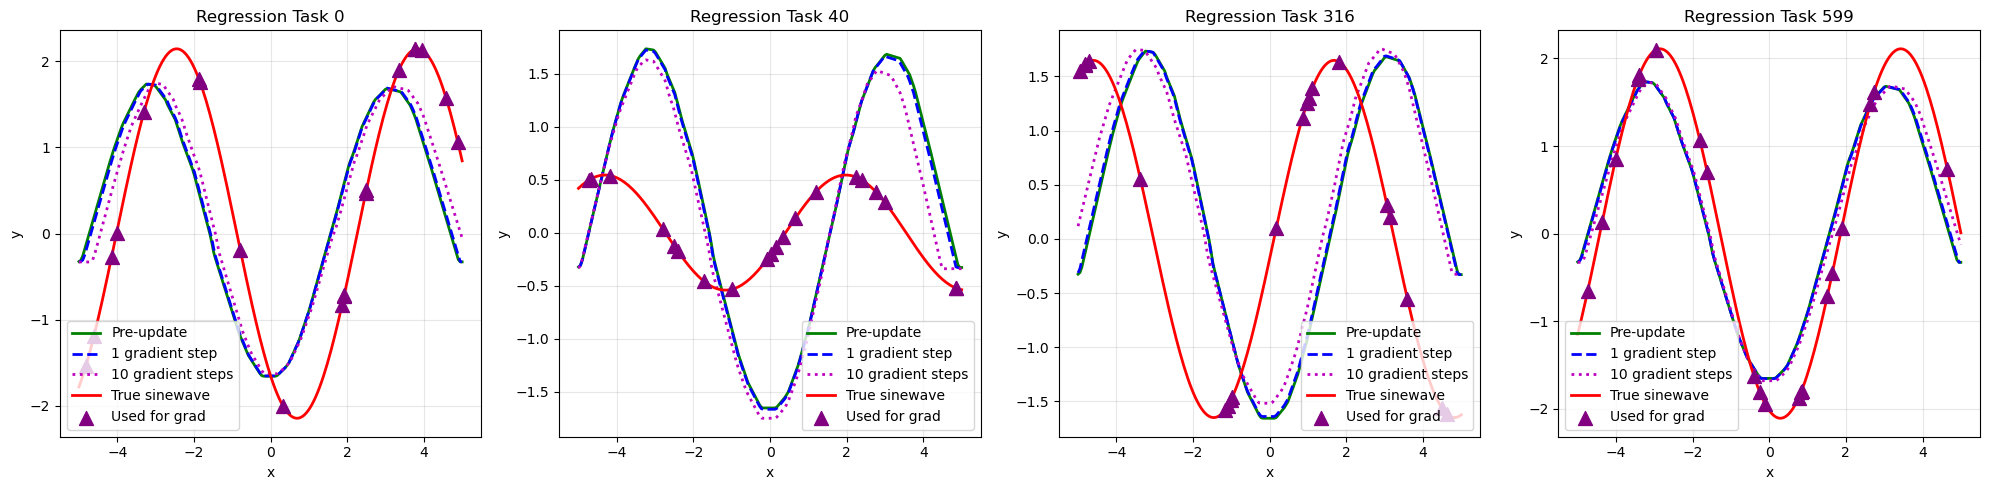

In [46]:
for i, prediction in enumerate(full_predictions_list):
    k = grad_steps[i]
    # each prediction is a dictionary with keys: 'MAML', 'pretrain', and 'oracle'
    print(f"Gradient steps: k={k}")

    for p_key in list(prediction.keys()):
        selected_predictions = prediction[p_key]
        num_figures = len(selected_predictions)
        
        # plot
        print(f"MODEL TYPE: {p_key}")
        plot_all_preds_vs_actual(selected_predictions, num_figures, p_key)        